In [1]:
import sys, os
sys.path.append("../main")
import ZI
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('dark_background')

# Stima parametri modello ZI

Per stimare i parametri per prima cosa importo i dati.

In [2]:
data = pd.read_csv("../data/best_matching.csv", usecols = [1,2,4,5,8])
data.head()

,Price,Volume,Quote,Type,Spread
0,0.0,0.0,NoBest,0.0,31.5
1,93.8,1.0,1,Limit,31.5
2,130.0,1.0,0,Limit,10.0
3,140.0,1.0,0,Limit,10.0
4,139.0,1.0,0,Cancel,9.0


Successivamente ho bisogno delle seguenti informazioni:

1. Volume limit orders per ordini alle migliori quote.
2. Spread quando vengono piazzati ordini alle migliori quote.
2. Volume Market order.
3. Volume cancellazioni di ordini alle migliori quote.
4. Volume medio delle migliori quote all ask e al bid.

In [3]:
# volume limit order alle migliori quote
X_lo = data[(data["Quote"] == "0") & (data["Type"] == "Limit")]["Volume"]
# spread limit order alle migliori quote (moltiplico per cento perché lo spread riportato
# è in € mentre per stimare il valore di lambda lo spread deve essere espresso in tick ovvero € cent)
spr = data[(data["Quote"] == "0") & (data["Type"] == "Limit")]["Spread"].multiply(100)
# volume market orders
X_mo = data[data["Type"] == "Market"]["Volume"]
# volume cancel order alle migliori quote
X_c = data[(data["Quote"] == "0") & (data["Type"] == "Cancel")]["Volume"]
# volume medio all'ask e al bid
V = 2

Una volta calcolate queste grandezze uso la funzione estimate_parameters, che mi ritorna i valori di $\lambda$, $\mu$, $\delta$, del modello ZI.

In [4]:
lam, mu, delta = ZI.estimate_parameters(X_lo, X_mo, X_c, spr, V)

print(f"lambda = {lam:.4f}, mu = {mu:.3f}, delta = {delta:.2f}")

lambda = 0.0027, mu = 0.099, delta = 0.13


Una volta che ho trovato i valori dei parametri li posso usare per fare delle simulazioni (nell'esempio vedo la distribuzione dello spread medio).

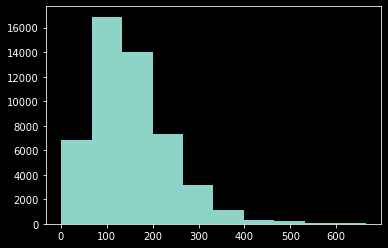

In [6]:
lob, sp, mp, _ = ZI.sim_LOB(lam, mu, delta, k = 2000, 
                                    iterations = 50_000, all_lob = False)

plt.hist(sp)
plt.show()